# Proceso EDA
---
1. Cargar los datos como un Pandas dataframe

2. LLevar a cabo un proceso EDA (Exploratory Data Analysis) para entender/comprender sus datos. Y esto significa:
  - Cuántas instancias y atributos hay
  - Qué tipo de atributos hay (numéricos o categóricos). Esto se hace para comprobar si hay características categóricas que deban ser codificadas (como dummies / one-hot-encoding)
  - Qué atributos tienen valores faltantes, y cuántos
  - Si se trata de un problema de clasificación o de regresión (variable de salida es una clase o un valor continuo), y en caso de clasificación, si la clase está desequilibrada.

3. Codificar el Pandas dataframe como una matriz numpy (transformar los valores categóricos y los valores faltantes)

4. Diseñar modelos de aprendizaje automático con scikit-learn

In [437]:
#imports
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import tree
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [438]:
# Cargamos el archivo
data_df = pd.read_csv("attrition_25/attrition_availabledata_06.csv") 

Podemos comprobar el valos de las primeras instancias del dataframe

In [439]:
data_df.head()

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No


El dataset es demasiado grande, por eso no podemos visualizarlo al completo

In [440]:
data_df

,hrs,absences,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,...,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,5.896431,5,3,3,2.0,4.0,3.0,33,Travel_Rarely,Research & Development,...,Y,13,8,0,6.0,3,5,1,4,No
1,6.114877,19,3,3,3.0,3.0,3.0,20,Travel_Rarely,Research & Development,...,Y,13,8,1,2.0,2,2,2,2,No
2,6.396730,11,3,3,1.0,4.0,4.0,46,Travel_Rarely,Research & Development,...,Y,11,8,1,28.0,2,7,4,3,Yes
3,5.722452,22,4,3,1.0,1.0,4.0,40,Travel_Rarely,Sales,...,Y,13,8,1,9.0,2,8,7,1,No
4,5.663001,21,3,3,4.0,4.0,3.0,38,Travel_Frequently,Research & Development,...,Y,17,8,3,10.0,2,10,9,9,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935,5.550183,18,3,3,2.0,2.0,3.0,32,Non-Travel,Research & Development,...,Y,11,8,1,12.0,2,7,0,7,No
2936,6.976802,21,3,4,3.0,4.0,2.0,51,Travel_Rarely,Research & Development,...,Y,22,8,1,18.0,2,7,0,7,No
2937,10.092581,12,3,3,3.0,4.0,3.0,28,Travel_Frequently,Sales,...,Y,11,8,0,7.0,3,7,0,7,No
2938,8.333744,18,2,3,2.0,4.0,3.0,24,Travel_Rarely,Sales,...,Y,15,8,2,6.0,2,6,1,4,No


Ahora observamos cuantos y qué tipo de datos vamos a estar tratando


In [441]:
print('The shape of the data table is:')
print('===============================')
print(data_df.shape)
print()

print('The types of the attributes are:')
print('================================')
data_df.info()

print()

print('How many missing values per attribute:')
print('======================================')
print(data_df.isnull().sum())

print()

print('Fraction of missing values per attribute:')
print('======================================')
print(data_df.isnull().mean())


The shape of the data table is:
(2940, 31)

The types of the attributes are:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   hrs                      2940 non-null   float64
 1   absences                 2940 non-null   int64  
 2   JobInvolvement           2940 non-null   int64  
 3   PerformanceRating        2940 non-null   int64  
 4   EnvironmentSatisfaction  2921 non-null   float64
 5   JobSatisfaction          2928 non-null   float64
 6   WorkLifeBalance          2913 non-null   float64
 7   Age                      2940 non-null   int64  
 8   BusinessTravel           2940 non-null   object 
 9   Department               2940 non-null   object 
 10  DistanceFromHome         2940 non-null   int64  
 11  Education                2940 non-null   int64  
 12  EducationField           2940 non-null   object 
 13  E

Gracias a este análisis sabemos que tendremos:

+ 2940 muestras (trabajadores)
+ 31 datos de cada una de ellas
    - Datos existentes de 3 tipos (object, int y float64)
    - Algunos datos faltan de ciertos trabajadores, pero comparándolo con el total no faltan demasiados
    - existen 8 variables de tipo object o categóricas que tendremos que convertir
+ Nuestra variable objetivo (attrition) es de tipo categórica, por lo que estamos ante un problema de clasificación


Puesto que nos encontramos ante un problema de clasificación debemos analizar si nuestra variable Attrition está equilibrada:

In [442]:
# Comprobar cuántas veces aparece cada clase en la columna 'Attrition'
print(data_df['Attrition'].value_counts())

# Comprobar la proporción de cada clase
print(data_df['Attrition'].value_counts(normalize=True))

Attrition
No     2466
Yes     474
Name: count, dtype: int64
Attrition
No     0.838776
Yes    0.161224
Name: proportion, dtype: float64


Podemos observar que la variable objetivo está muy desvalanceada, por lo que más ademlante debemos tenerlo en cuenta para nuestro arbol


# Preprocesado
---


Pero primero debemos comprobar que variables son innecesarias y, por tanto, se pueden eliminar, como aquellas constantes.


Tambien analizaremos la cardinalidad de nuestras variables para ver cuales poseen una demasiado alta

In [443]:
# Identificar columnas constantes
constant_columns = [col for col in data_df.columns if data_df[col].nunique() == 1]

# Eliminar las columnas constantes del dataframe
processed_df = data_df.drop(columns=constant_columns)

# Mostrar las columnas eliminadas
print(f"Columnas eliminadas (constantes): {constant_columns}")




Columnas eliminadas (constantes): ['EmployeeCount', 'Over18', 'StandardHours']


In [444]:
# Paso 1: Identificar variables categóricas
categorical_columns = processed_df.select_dtypes(include=['object']).columns

# Paso 2: Contar las categorías únicas por variable
cardinality = processed_df[categorical_columns].nunique()

print("Cardinalidad de las variables categóricas:")
print(cardinality)

Cardinalidad de las variables categóricas:
BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Attrition         2
dtype: int64


Éstos datos nos indican que no tenemos ninguna variable con demasiada cardinalidad.

variable con más cardinalidad: "JobRole" con 9

debemos tener en cuenta las diferentes opciones de escalado e imputación para la creación de los pipelines y obtener así la mejor de todas

In [ ]:
numerical_columns = data_df.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = data_df.select_dtypes(include=['object']).columns.drop('Attrition')


# Opciones de escalado e imputación
scalers = {
    "standard": StandardScaler(),
    "minmax": MinMaxScaler(),
    "robust": RobustScaler()
}

imputers = {
    "mean": SimpleImputer(strategy="mean"),
    "median": SimpleImputer(strategy="median")
}





Generamos nuestra funcion para crear distintos pipelines

Como el dataset se encuentra desbalanceado debemos incluir `class_weight='balanced' 

In [446]:
# Definir pipeline base
def create_pipeline(scaler, imputer):
    numerical_transformer = Pipeline(steps=[
        ('imputer', imputer),
        ('scaler', scaler)
    ])

    categorical_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numerical_transformer, numerical_columns),
            ('cat', categorical_transformer, categorical_columns)
        ]
    )

    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(class_weight='balanced'))
    ])

    return pipeline



Ahora comprobaremos la correlación de las variables con respecto a nuestra variable objetivo:

/tmp/ipykernel_5759/329369917.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_correlation.index, y=top_correlation.values, palette="coolwarm")


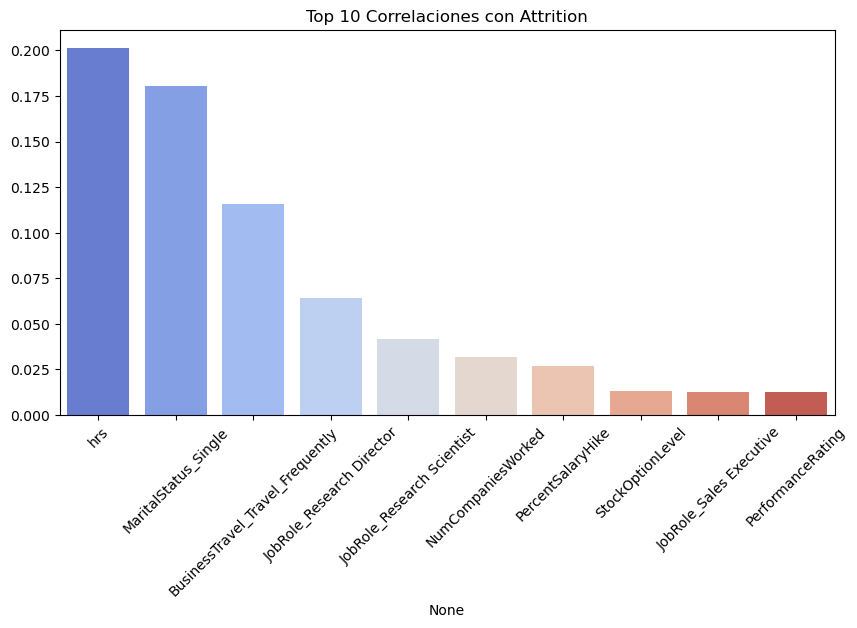

In [447]:
# Mapea directamente la columna 'Attrition' a valores binarios
data_df['Attrition'] = data_df['Attrition'].map({'Yes': 1, 'No': 0})

# Usar OneHotEncoder para convertir variables categóricas en variables numéricas
data_df_encoded = pd.get_dummies(data_df, drop_first=True)

# Calcular la correlación de todas las variables con 'Attrition'
correlation_with_attrition = data_df_encoded.corr()['Attrition'].sort_values(ascending=False)

# Seleccionar las 10 variables con la mayor correlación para mostrarlas
top_n = 10
top_correlation = correlation_with_attrition[1:top_n+1]  # Excluimos 'Attrition' que siempre tendrá correlación 1

# Mostrar el gráfico de correlación
plt.figure(figsize=(10, 5))
sns.barplot(x=top_correlation.index, y=top_correlation.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title(f"Top {top_n} Correlaciones con Attrition")
plt.show()


Esto indica que las horas de trabajo están fuertemente relacionadas al igual que si nuestro trabajador está casado o no.



Codificamos la salida separando los datos en train/test


In [448]:
X = data_df.drop(columns=['Attrition'])  # Elimina la columna 'Attrition'
y = data_df['Attrition']  # Definir la variable objetivo

# Seleccionados train/test en modo stratify, ya que el dataset se encuentra desbalanceado
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=1/3, random_state=42)

## Hiperparámetros y evaluacion de modelos

Llevamos a cabo la optimizacion de hiperparámetros utilizando KNN



In [449]:
# Definir los hiperparámetros para buscar
param_grid = {
        'preprocessor__num__imputer': [SimpleImputer(strategy='mean'), SimpleImputer(strategy='median'), KNNImputer(n_neighbors=5)],
        'preprocessor__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7, 10, 15],
        'classifier__weights': ['uniform', 'distance'],
        'classifier__metric': ['euclidean', 'manhattan']
    }



inner_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    create_pipeline(MinMaxScaler(), SimpleImputer(strategy="mean")),  # Necesita un Pipeline base
    param_grid, # El pipeline base anterior lo reemplaza por todas las opciones aquí
    cv=inner_cv,
    scoring='balanced_accuracy',
    n_jobs=-1,
    verbose=1
)


# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)


# Mostrar los mejores parámetros encontrados
print("Mejores hiperparámetros:", grid_search.best_params_)



# Acceder al mejor modelo entrenado
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


Mejores hiperparámetros: {'classifier': KNeighborsClassifier(), 'classifier__metric': 'manhattan', 'classifier__n_neighbors': 3, 'classifier__weights': 'distance', 'preprocessor__num__imputer': SimpleImputer(), 'preprocessor__num__scaler': RobustScaler()}


Los mejores hiperparámetros que ha elegido GridSearchCV son:

-   Criterio de división del árbol → 'gini'
-   Profundidad máxima del árbol → None (es decir, sin límite de profundidad)
-   Mínimo de muestras por hoja → 2
-   Método de imputación → SimpleImputer() (por defecto usa strategy='mean', es decir, reemplazar valores faltantes con la media)
-   Método de escalado → StandardScaler() (escalado estándar: media 0, desviación estándar 1)





Finalmente entrenamos nuestro código

In [450]:
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


Ahora se evaluará con los hiperparámetros por omisión

In [ ]:
# Crear el pipeline con los valores predeterminados
default_pipeline = Pipeline(steps=[
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer()),  # Default: strategy='mean'
            ('scaler', StandardScaler())   # Default: StandardScaler()
        ]), numerical_columns),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),  
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_columns)
    ])),
    ('classifier', DecisionTreeClassifier())  # Todos los valores por omisión
])

# Entrenar el modelo con valores por defecto
default_pipeline.fit(X_train, y_train)

# Predecir con el modelo por defecto
y_pred_default = default_pipeline.predict(X_test)




Calculamos las métricas

In [ ]:
balanceado = balanced_accuracy_score(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
matrizConfusion = confusion_matrix(y_test, y_pred)

# Evaluar el modelo por omisión
default_acc = accuracy_score(y_test, y_pred_default)
default_balanced_acc = balanced_accuracy_score(y_test, y_pred_default)



print("BalancedAcc:", balanceado)
print(f"\nBalanced Accuracy con hiperparámetros por omisión: {default_balanced_acc}")
print("--------------------------------------")
print("Acc:", acc)
print(f"\nAcc con hiperparámetros por omisión: {default_acc}")
print("--------------------------------------")
print("MatrizConf:", matrizConfusion)


BalancedAcc: 0.8905879454248669
--------------------------------------
Acc: 0.9408163265306122
--------------------------------------
MatrizConf: [[793  29]
 [ 29 129]]


Como nuestros datos están desbalanceados nos ayudará sacar el TPR y el TNR

In [452]:
TPR = matrizConfusion[1, 1] / (matrizConfusion[1, 0] + matrizConfusion[1, 1])  
TNR = matrizConfusion[0, 0] / (matrizConfusion[0, 0] + matrizConfusion[0, 1])

print("True Positive Rate: ", TPR)
print("True Negative Rate: ", TNR)

True Positive Rate:  0.8164556962025317
True Negative Rate:  0.9647201946472019
